In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
Data_train = pd.read_csv("C:/Users/Ecce H/Team_project/Disease_Prediction_With_ML/data/raw/Training.csv")

In [27]:
#informations about the dataset
Data_train.head()
Data_train.shape
Data_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), str(1)
memory usage: 5.0 MB


The dataset contains 4920 observations (rows), each representing a patient record.
There are 134 columns, including 132 symptom features, one target variable (prognosis), and one extra column that was later removed (originally an index column from the CSV).
The symptom features are binary (0 = absence, 1 = presence) indicating whether each symptom is observed for a patient.
The target variable prognosis is categorical with 41 unique disease classes.

In [54]:
#Type of data
print(Data_train.dtypes)

itching                 int64
skin_rash               int64
nodal_skin_eruptions    int64
continuous_sneezing     int64
shivering               int64
                        ...  
inflammatory_nails      int64
blister                 int64
red_sore_around_nose    int64
yellow_crust_ooze       int64
prognosis                 str
Length: 133, dtype: object


In [29]:
# dataset  columns names
print(Data_train.columns)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis',
       'Unnamed: 133'],
      dtype='str', length=134)


In [32]:
# 5 first row of the dataset
Data_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [33]:
# Drop the unnamed column"Unnamed:133"
Data_train = Data_train.drop(columns=['Unnamed: 133'])

In [34]:
#check
Data_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [36]:
# Checking missing values
missing = Data_train.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [37]:
Data_train.duplicated().sum()

np.int64(4616)

That's mean that we have 4616 duplicates and so only (4920-4616 = 304)304 are unique row

In [38]:
#  'prognosis' is the variable Y
X = Data_train.drop(columns=['prognosis'])
y = Data_train['prognosis']   # variable (keep separately)

In [ ]:
#MDescription of X
X.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# Select numeric columns only
numeric_cols = Data_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute correlation matrix for numeric features only
corr_matrix = Data_train[numeric_cols].corr()
print(corr_matrix)

                       itching  skin_rash  nodal_skin_eruptions  \
itching               1.000000   0.318158              0.326439   
skin_rash             0.318158   1.000000              0.298143   
nodal_skin_eruptions  0.326439   0.298143              1.000000   
continuous_sneezing  -0.086906  -0.094786             -0.032566   
shivering            -0.059893  -0.065324             -0.022444   
...                        ...        ...                   ...   
small_dents_in_nails -0.061573   0.331087             -0.023073   
inflammatory_nails   -0.061573   0.331087             -0.023073   
blister              -0.061573   0.331087             -0.023073   
red_sore_around_nose -0.061573   0.331087             -0.023073   
yellow_crust_ooze    -0.061573   0.331087             -0.023073   

                      continuous_sneezing  shivering    chills  joint_pain  \
itching                         -0.086906  -0.059893 -0.175905   -0.160650   
skin_rash                       -0.0947

“We analyzed correlations among numeric symptom features to understand relationships and potential redundancies.

Most features are weakly to moderately correlated, suggesting largely independent symptom data.

Some features show high positive correlations, e.g., continuous_sneezing and red_sore_around_nose (r = 0.946), indicating that these symptoms frequently co-occur.

High correlations may suggest redundancy; for models sensitive to multicollinearity (e.g., logistic regression), one feature of each highly correlated pair could be removed.”

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

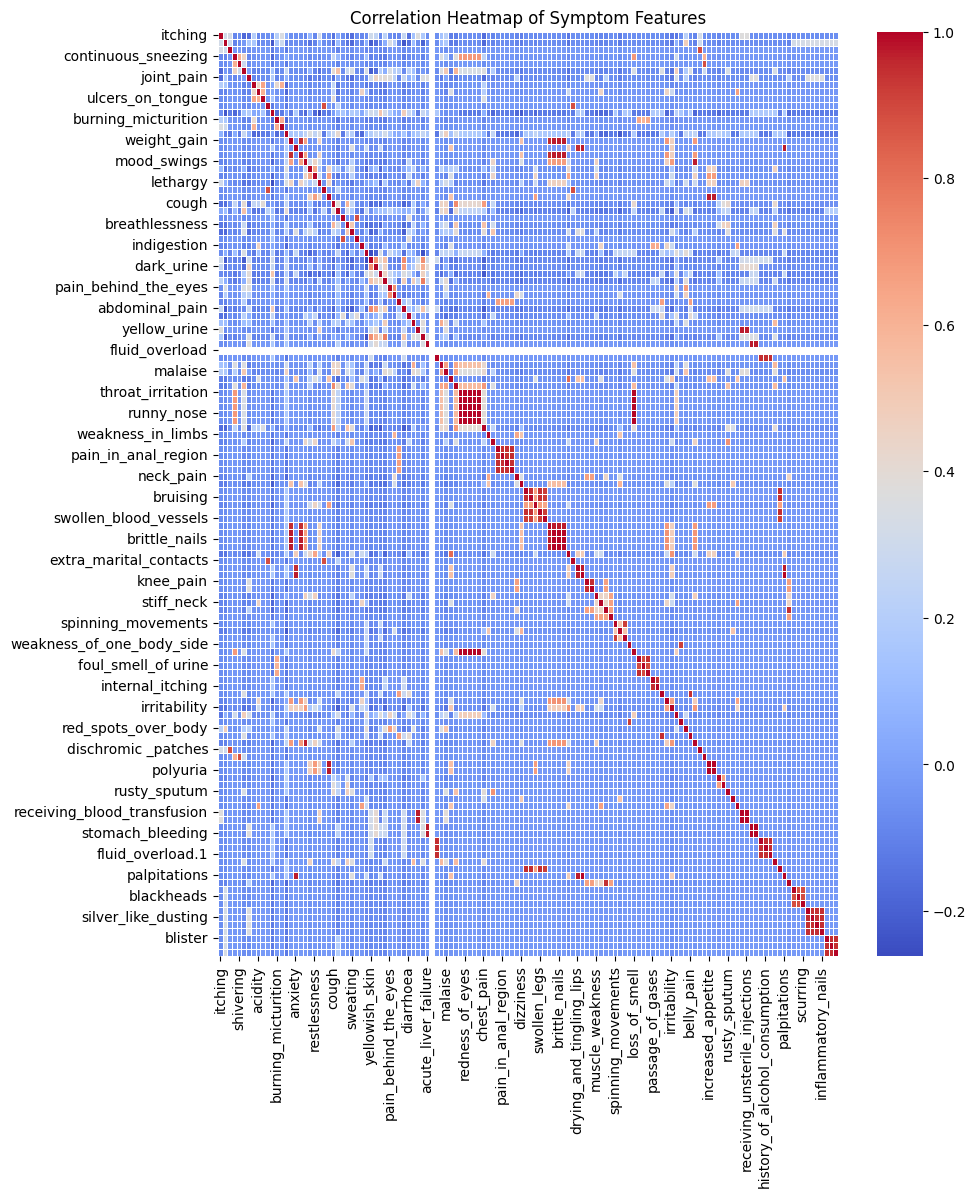

In [51]:
#Plot the heatmap
plt.figure(figsize=(10,12))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Symptom Features")
plt.show()


In [53]:
import pandas as pd
import numpy as np

# Assuming X contains your features only (no prognosis)
X = Data_train.drop(columns=['prognosis'])

# Compute correlation matrix
corr_matrix = X.corr().abs()  # absolute value for positive correlation

# Select upper triangle of correlation matrix (to avoid duplicates and self-correlation)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find feature pairs with correlation > 0.7
high_corr_pairs = (
    upper_tri.stack()
    .reset_index()
    .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'})
    .query('correlation > 0.7')
    .sort_values(by='correlation', ascending=False)
)

print(f"Number of highly correlated symptom pairs: {len(high_corr_pairs)}")
print(high_corr_pairs)

Number of highly correlated symptom pairs: 107
                feature_1        feature_2  correlation
6786    throat_irritation       runny_nose     1.000000
6785    throat_irritation   sinus_pressure     1.000000
6784    throat_irritation  redness_of_eyes     1.000000
6919      redness_of_eyes       congestion     1.000000
6918      redness_of_eyes       runny_nose     1.000000
...                   ...              ...          ...
9467     enlarged_thyroid       depression     0.707560
9731  swollen_extremeties       depression     0.707560
9599        brittle_nails       depression     0.707560
7764      fast_heart_rate     rusty_sputum     0.707560
9864     excessive_hunger     irritability     0.702543

[107 rows x 3 columns]


We found 107 pairs of symptom features exhibiting strong positive correlations (correlation ≥ 0.7).
Many of these pairs indicate symptoms that often co-occur or reflect similar underlying conditions.
Pairs with perfect correlation (1.00) could be:

Duplicate features that need to be merged or one dropped.

Symptoms that always appear simultaneously, possibly clinically linked or due to data collection.

Correlations slightly above 0.7 suggest:

Strong symptom co-occurrence patterns worth further study.

Potential redundancy that could be addressed during feature selection to simplify models.

In [41]:
#print the variable column
print(y)

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: str


In [43]:
# Check the prognosis column, our variable 
y.value_counts()
# proportions
y.value_counts(normalize=True)  

prognosis
Fungal infection                           0.02439
Allergy                                    0.02439
GERD                                       0.02439
Chronic cholestasis                        0.02439
Drug Reaction                              0.02439
Peptic ulcer diseae                        0.02439
AIDS                                       0.02439
Diabetes                                   0.02439
Gastroenteritis                            0.02439
Bronchial Asthma                           0.02439
Hypertension                               0.02439
Migraine                                   0.02439
Cervical spondylosis                       0.02439
Paralysis (brain hemorrhage)               0.02439
Jaundice                                   0.02439
Malaria                                    0.02439
Chicken pox                                0.02439
Dengue                                     0.02439
Typhoid                                    0.02439
hepatitis A          

In [45]:
num_diseases = Data_train['prognosis'].nunique()
print("Number of unique diseases:", num_diseases)

Number of unique diseases: 41


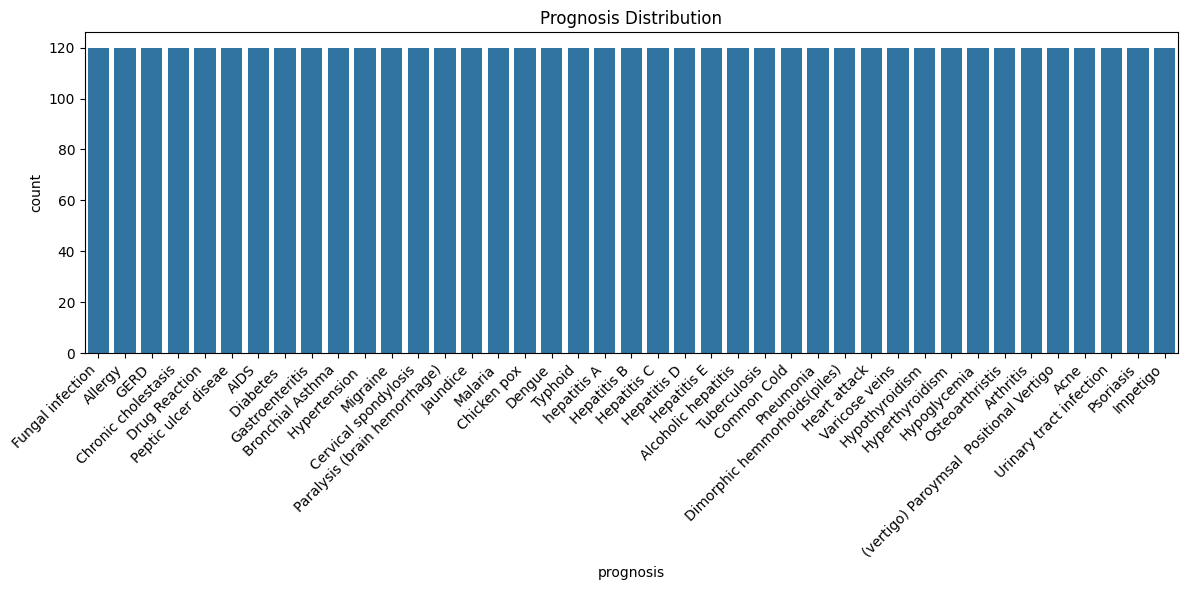

In [44]:
# Visualize the distribution of the prognosis to see if there is any imbalance class
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))  # wider figure
sns.countplot(x='prognosis', data=Data_train)
plt.title("Prognosis Distribution")
plt.xticks(rotation=45, ha='right')  # rotate and align right
plt.tight_layout()  # adjust layout to prevent clipping
plt.show()

From the above plot, we can observe that the dataset is a balanced dataset i.e. there are exactly 120 samples for each disease, and no further balancing is required. We can notice that our target column i.e. prognosis column is of object datatype, this format is not suitable to train a machine learning model. We will have to use a label encoder to change it to numerical type.

In [55]:
Data_test = pd.read_csv("C:/Users/Ecce H/Team_project/Disease_Prediction_With_ML/data/raw/Testing.csv")

In [56]:
print(Data_test.head())       # first 5 rows
print(Data_test.shape)        # number of rows and columns
print(Data_test.columns)      # column names

   itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             

In [57]:
print(Data_test.dtypes)

itching                 int64
skin_rash               int64
nodal_skin_eruptions    int64
continuous_sneezing     int64
shivering               int64
                        ...  
inflammatory_nails      int64
blister                 int64
red_sore_around_nose    int64
yellow_crust_ooze       int64
prognosis                 str
Length: 133, dtype: object


In [58]:
# Separate X and Y
X_test = Data_test.drop(columns=['prognosis'])
y_test = Data_test['prognosis']

In [59]:
# Number of entries and columns
print(f"Number of entries (rows) in test set: {Data_test.shape[0]}")
print(f"Number of columns (features + target) in test set: {Data_test.shape[1]}\n")

Number of entries (rows) in test set: 42
Number of columns (features + target) in test set: 133

